# Tutorial - Analysis of Airline Passenger Satisfaction

#### Created by Ankit Chandnani
#### Final Project Tutorial - CMSC320
#### July 21st, 2020

<div>
<img src="https://images.unsplash.com/photo-1529074963764-98f45c47344b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1964&q=80" width="900"/>
</div>


# Introduction

In December 2019, a novel coronavirus strain (SARS-CoV-2 or COVID-19) emerged in the city of Wuhan, China. The COVID-19 pandemic is causing a worldwide crisis. Many countries have closed schools and daycare centers, canceled events, imposed stay-at-home orders, and closed borders. Everyday activities like going to school, doing leisure activities, and meeting friends have been canceled and prohibited with short notice. This is also includes suspension of most international travel throughout the world. This coronavirus crisis has been the biggest disruption in the history of the aviation industry. More information about this disruption could be found on this link: 

https://www.weforum.org/agenda/2020/03/world-travel-coronavirus-covid19-jobs-pandemic-tourism-aviation/

As people and companies dream to touch the skies again, they as well as the airline businesses have to do their best to curb the spread of COVID-19. 

During these difficult times, customers who choose the fly with airlines would want to make sure their safety is prioritized as well as be satisfied with their overall service. To help understand what components of air travel customers most care about, I will research "What factors are highly correlated to a satisfied (or dissatisfied) passenger?" and "Can you predict passenger satisfaction?". 

I am using a dataset filled with responses to a survey on passenger satisfaction from kaggle.com. The link to the dataset being used is here: ([Kaggle Dataset](https://www.kaggle.com/johndddddd/customer-satisfaction?)). There are around 130,000 responses to the survey in this dataset. In the next section I will give a complete overview of the data.

# Getting Started with the Data

To complete this tutorial, I am using python 3 in Jupyter notebooks. I have also imported the required modules below to help me perform macthematics and scientific calculations, create dataframes,visualize different types of plots, machine learning, and statistical calculations. The modules required are pandas, numpy, plotnine, sklearn, matplotlib. 

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from statsmodels.api import add_constant
import seaborn as sns

from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

To start off, I have downloaded the dataset called satisfaction.csv and placed it in the appropriate folder. I used read_csv to read the dataset and dropped the 'id' column as it had no value during this investigation. I renamed the Satisfaction column which is a categorical variable which mentions if the respondee is 'satisfied' or 'dissatisfied / neutral'. 

In [2]:
data = pd.read_csv("satisfaction.csv")
data = data.drop(['id'], axis = 1)
data = data.rename(columns = {'satisfaction_v2': 'Satisfaction Level'})
pd.set_option('display.max_columns', None) 
data.head()

Satisfaction Level  Gender   Customer Type  Age   Type of Travel     Class  \
0          satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1          satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2          satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3          satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4          satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               2                       3   
1                       2               2                       3   
2                       0               2                       2   
3                       4               3                       1   
4                       3               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0

As you can see above, there are 23 columns in the dataset. From the 23 columns, 5 are categorical variables. The descriptions of all the columns in the dataset above is present below:


- Gender: Gender of the respondee (Options - Female, Male)


- Customer Type: The customer type of the respondee (Options - Loyal customer, disloyal customer)


- Age: The actual age of the respondee (Continous variable)


- Type of Travel: Purpose of the flight of the respondee (Options - Personal Travel, Business Travel)


- Class: Travel class in the plane of the respondee (Options - Business, Eco, Eco Plus)


- Flight distance: The flight distance of this journey


- Inflight wifi service: Satisfaction level of the inflight wifi service according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)

- Ease of Online booking: Satisfaction level of online booking according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Gate location: Satisfaction level of Gate location according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Food and drink: Satisfaction level of Food and drink according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Online boarding: Satisfaction level of online boarding according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Seat comfort: Satisfaction level of Seat comfort according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Inflight entertainment: Satisfaction level of inflight entertainment according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- On-board service: Satisfaction level of On-board service according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Leg room service: Satisfaction level of Leg room service according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Baggage handling: Satisfaction level of baggage handling according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Check-in service: Satisfaction level of Check-in service according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Inflight service: Satisfaction level of inflight service according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Cleanliness: Satisfaction level of Cleanliness according to the respondee (Options - 0:Not Applicable; Range from 1-5 where 1-> lowest and 5 -> highest)


- Departure Delay in Minutes: Minutes delayed when departure


- Arrival Delay in Minutes: Minutes delayed when Arrival


- Satisfaction: Airline satisfaction level according to the respondee (Options - Satisfaction, neutral or dissatisfaction)

In [3]:
data.shape

(129880, 23)

The dataset consists of 129,880 rows and 23 columns without tidying up. This dataset will go through a cleaning process where invalid and not applicable values will be removed.

In [4]:
data['Inflight entertainment'].unique()

array([4, 2, 0, 3, 5, 1])

From the last line of output we can observe that the Range for satisfaction in the 'Inflight entertainment' is from 0-5 where 0 is not applicable. We will edit the dataset to tidy and remove the 0 level of satisfaction from the columns where the range is from 0-5. 

In [5]:
# choosing rows with feature values greater than 0
data = data.loc[data['Seat comfort'] > 0]
data = data.loc[data['Departure/Arrival time convenient'] > 0]
data = data.loc[data['Food and drink'] > 0]
data = data.loc[data['Gate location'] > 0]
data = data.loc[data['Inflight entertainment'] > 0]
data = data.loc[data['Online support'] > 0]
data = data.loc[data['Ease of Online booking'] > 0]
data = data.loc[data['On-board service'] > 0]
data = data.loc[data['Leg room service'] > 0]
data = data.loc[data['Baggage handling'] > 0]
data = data.loc[data['Checkin service'] > 0]
data = data.loc[data['Cleanliness'] > 0]
data = data.loc[data['Online boarding'] > 0]

data.shape

(119612, 23)

The above code has cut the number of rows in the above dataset by around 10,000. We now only have responses with satisfaction that ranges from 1-5 where 1 is the lowest and 5 is the highest. Next we will get rid of the NaN values in the 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' columns.

In [6]:
# getting rid of rows with nans
data = data.dropna()
data.shape

(119256, 23)

We have cut down the rows by 356 after this edit to the dataset. This will be the version of the dataset that will be used in the following sections. The first 5 rows of the final version is shown below.

In [7]:
data.head()

Satisfaction Level Gender   Customer Type  Age   Type of Travel  \
1037  neutral or dissatisfied   Male  Loyal Customer   48  Personal Travel   
1038  neutral or dissatisfied   Male  Loyal Customer   48  Personal Travel   
1041  neutral or dissatisfied   Male  Loyal Customer   40  Personal Travel   
1043  neutral or dissatisfied   Male  Loyal Customer   46  Personal Travel   
1044  neutral or dissatisfied   Male  Loyal Customer   63  Personal Travel   

     Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
1037   Eco             4001             1                                  1   
1038   Eco             3980             1                                  1   
1041   Eco             2251             1                                  1   
1043   Eco             2453             1                                  1   
1044   Eco             2011             1                                  1   

      Food and drink  Gate location  Inflight wifi service  \
1037               1              1                      1   
1038               1              1                      4   
1041               1              1                      1   
1043               1              1                      3   
1044               1              1                      5   

      Inflight entertainment  Online support  Ease of Online booking  \
1037                       1               1                       1   
1038                       1               4                       4   
1041                       1               1                       1   
1043                       1               5                       3   
1044                       1               5                       5   

      On-board service  Leg room service  Baggage handling  Checkin service  \
1037                 4                 1                 1                4   
1038                 2                 3                 2                3   
1041                 3                 3                 2                1   
1043                 1                 4                 1                2   
1044                 1                 5                 2                1   

      Cleanliness  Online boarding  Departure Delay in Minutes  \
1037            2                1                          16   
1038            2                4                           0   
1041            1                1                           0   
1043            2                3                           3   
1044            2                5                          25   

      Arrival Delay in Minutes  
1037                       0.0  
1038                       0.0  
1041                       8.0  
1043                      15.0  
1044                      25.0

As we have cleaned up the data and removed thousands of rows, the index currently starts at 1037. To combat this inconsistency, we us the reset_index() method to reset the index. We also drop the column created by reset_index() method. 

In [8]:
data = data.reset_index()
data = data.drop('index', axis = 1)

# Exploratory Data Analysis

In this section, we will get a better feel of the data through summary statistics, visualization. I will display skew, how distributed the data is, trends, and how pairs of variables interact in this section. This data along with the graphs will help us understand the relationships between variables.

### Plotting number of satisfied customers by gender (male and female)

Here I plot the number of satisfied customers grouped by gender (male and female) to understand which gender is more satisfied. This information could help understand which gender to target more depending on the level of satisfaction. 

In [9]:
gender_age = data.groupby(['Gender', 'Satisfaction Level'])['Age']
gender_age.describe()

count       mean        std  min   25%  \
Gender Satisfaction Level                                                  
Female neutral or dissatisfied  21337.0  37.290481  14.957234  7.0  25.0   
       satisfied                39130.0  41.083746  14.942756  7.0  30.0   
Male   neutral or dissatisfied  33349.0  38.032745  16.495144  7.0  25.0   
       satisfied                25440.0  42.509631  12.313964  7.0  34.0   

                                 50%   75%   max  
Gender Satisfaction Level                         
Female neutral or dissatisfied  36.0  48.0  85.0  
       satisfied                42.0  52.0  85.0  
Male   neutral or dissatisfied  37.0  51.0  85.0  
       satisfied                43.0  52.0  85.0

Now we extract the male and female satisfaction level values from the table above.

In [10]:
female_values = [gender_age.count()[0], gender_age.count()[1]]
male_values = [gender_age.count()[2], gender_age.count()[3]]

print(female_values)
print(male_values)

[21337, 39130]
[33349, 25440]


To visualize the above values, 2 bar charts will be created. The y axis will contain the number of respondees and x axis will contain the two satisfaction levels - unsatisfied / neutral and satisfied

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Satisfaction (Male)'),
 Text(0.5, 1.0, 'Satisfaction count')]

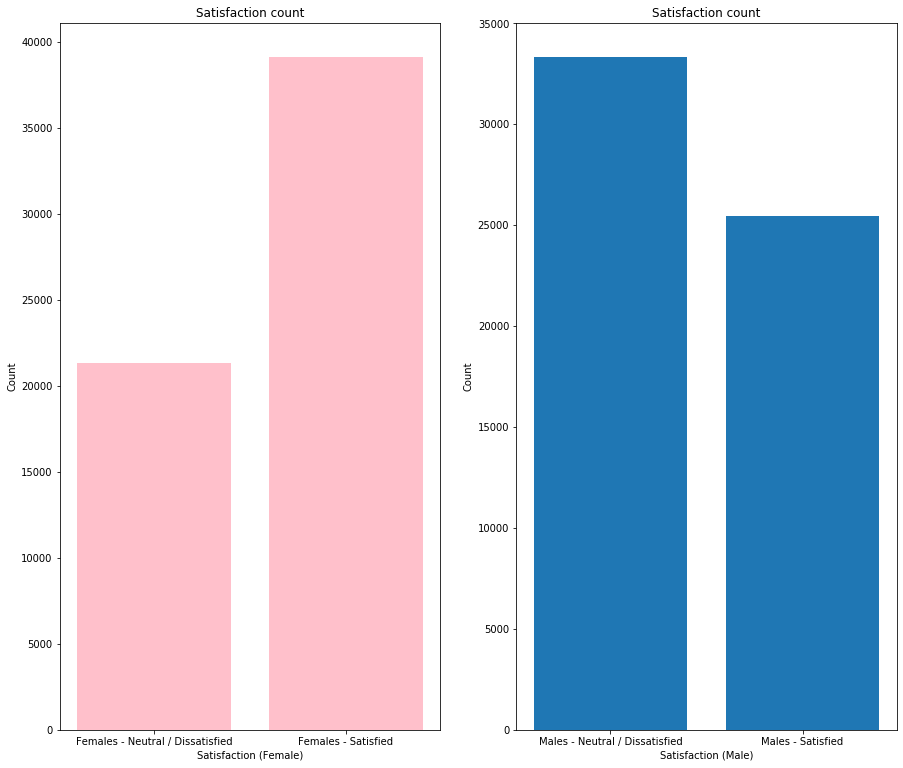

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,13))
axs[0].bar(['Females - Neutral / Dissatisfied', 'Females - Satisfied'], female_values, color = ['pink'])
axs[0].set(xlabel="Satisfaction (Female)", ylabel="Count", title = "Satisfaction count")

axs[1].bar(['Males - Neutral / Dissatisfied', 'Males - Satisfied'], male_values)
axs[1].set(xlabel="Satisfaction (Male)", ylabel="Count",  title = "Satisfaction count")

Observing the graphs above, we see considerably more females were satisfied with the airlines services in comparison to males who were surveyed. Males could either be more difficult to satisfy in comparison to females or the services towards the males surveyed were geniunely not upto par / worse than those towards females. In both cases, airlines know to target males to help increase their satisfaction level.

We continue to create another 2 graphs based on gender and type of travel. The type of travel could be a personal or business one. This would help us understand which type of travel each gender would travel more with.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Travel Type (Male)'),
 Text(0.5, 1.0, 'Travel type count (Male)')]

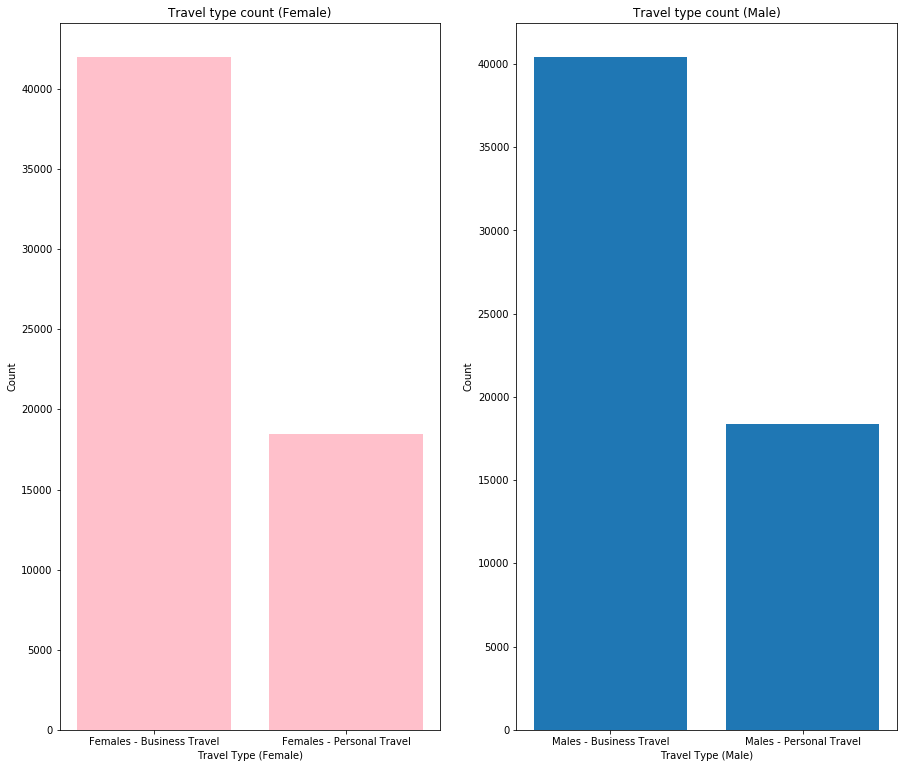

In [12]:
temp =  data.groupby(['Gender', 'Type of Travel'])['Age'].count()

female_values = [temp[0], temp[1]]
male_values = [temp[2], temp[3]]

fig, axs = plt.subplots(1, 2, figsize=(15,13))
axs[0].bar(['Females - Business Travel', 'Females - Personal Travel'], female_values, color = ['pink'])
axs[0].set(xlabel="Travel Type (Female)", ylabel="Count", title = "Travel type count (Female)")

axs[1].bar(['Males - Business Travel', 'Males - Personal Travel'], male_values)
axs[1].set(xlabel="Travel Type (Male)", ylabel="Count", title = "Travel type count (Male)")

There is not much of a difference between the type of travel between the genders. However, we now know that more people travel for business in this survey in comparison to personal travel. 

### Plotting age count according to different class types

In this subsection, I will find a relationship between two other variables - age of respondees and different class types. Three plots will be created where each plot will count the number of  respondees in each age based on their class types. The three class types are economy, economy plus, and business. Hence, the plots will count the ages of respondees in class types of economy, economy plus, and business. 

Percentage of people travelling through economy class: 44.01204132286845%
Percentage of people travelling through economy plus class: 7.362313007312%
Percentage of people travelling through business class: 48.62564566981955%


Text(0.5, 1.0, 'Count of class (Business Class) over Age')

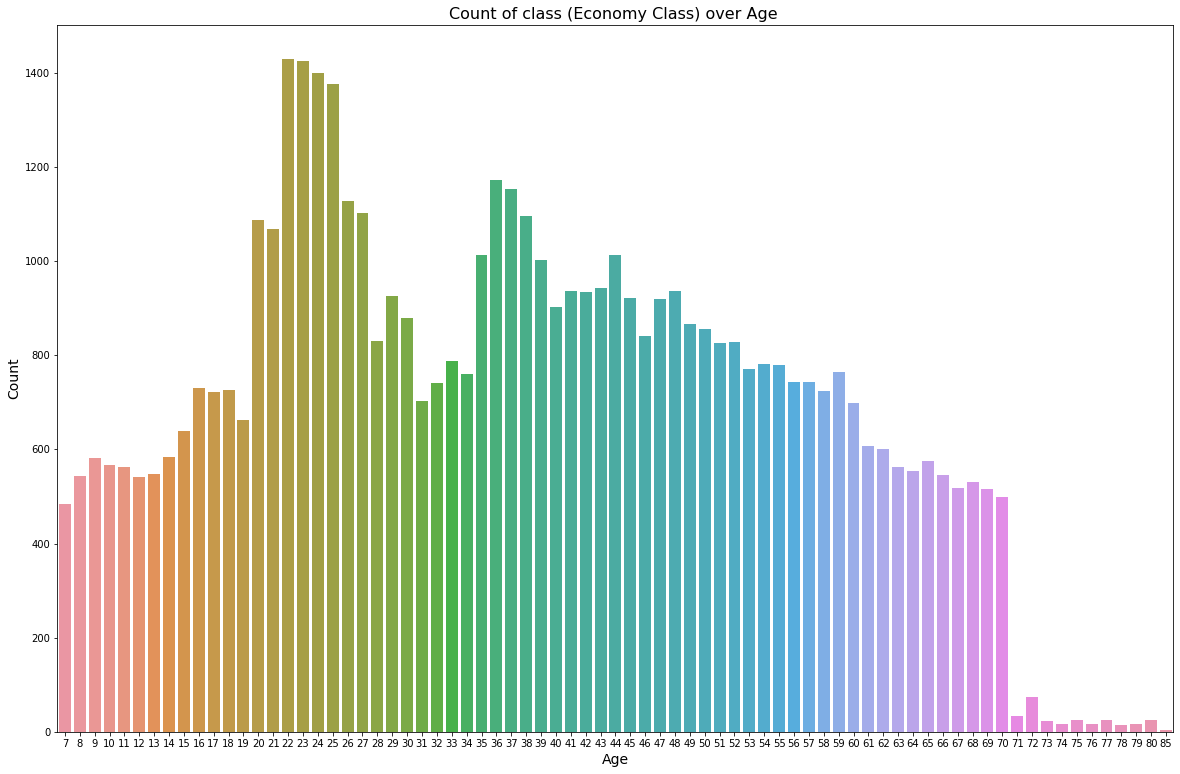

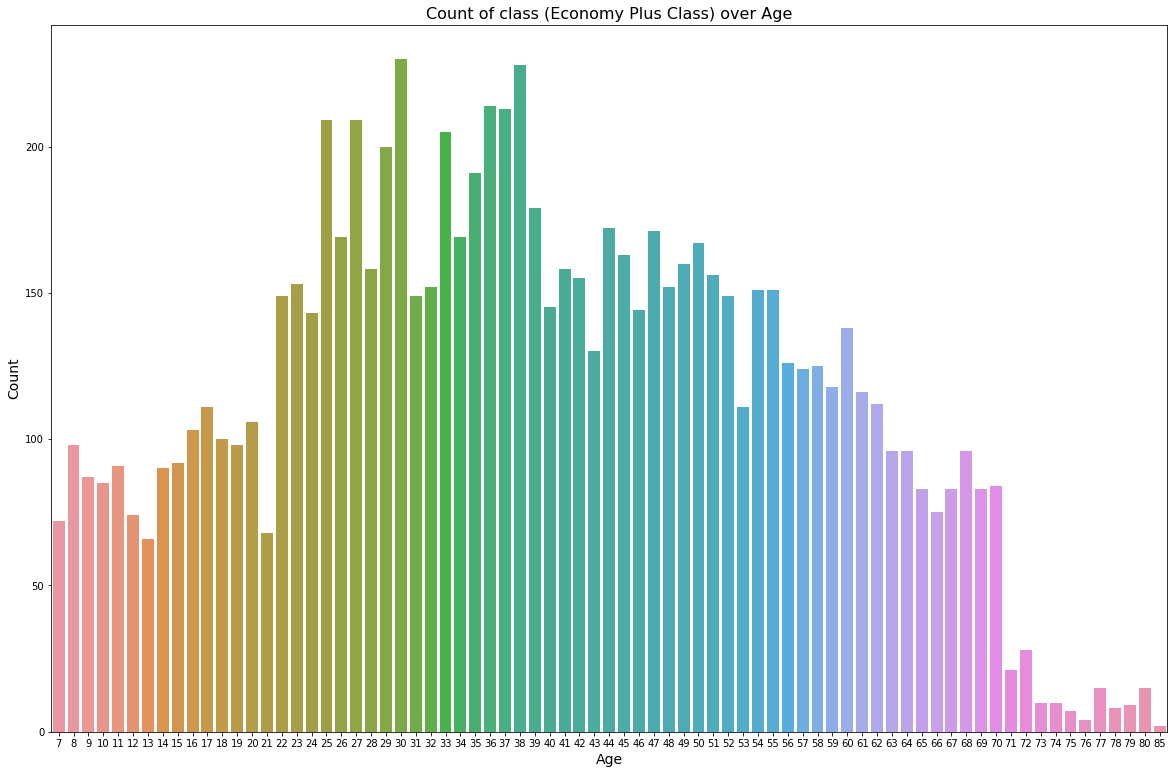

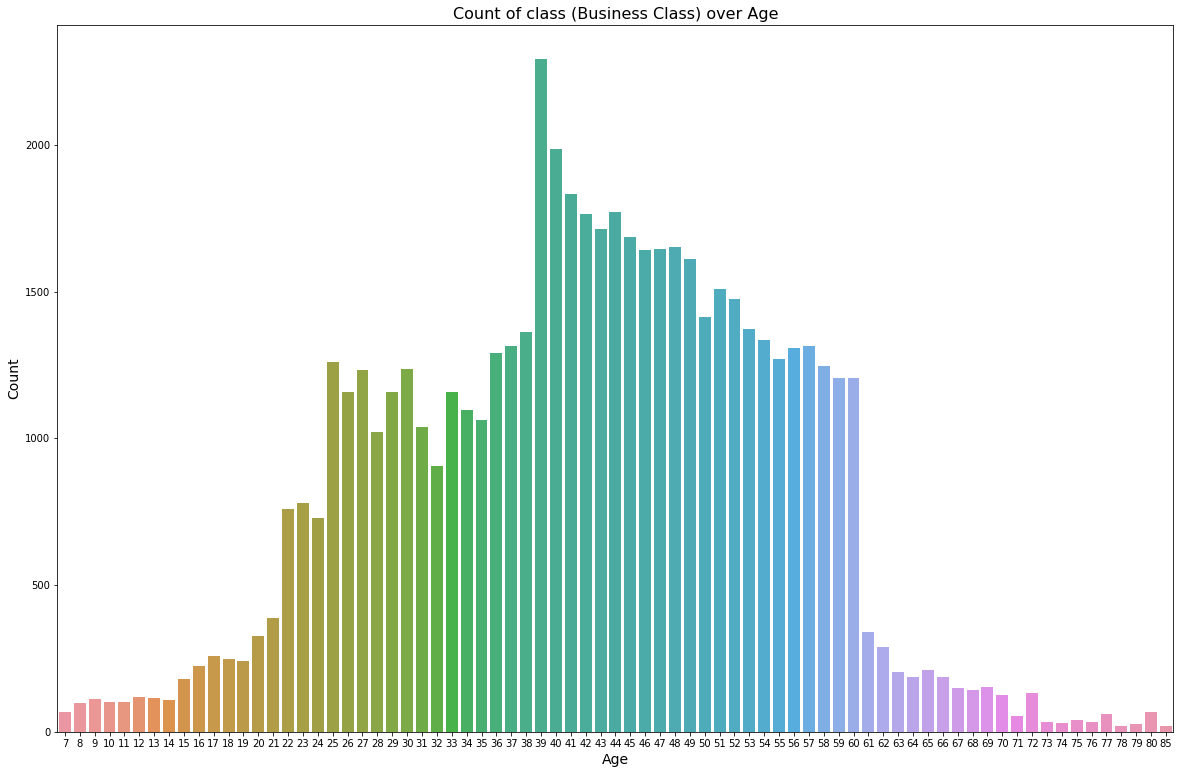

In [13]:
# splitting the dataset into 3 others according to the different class types.
eco = data.loc[data['Class'] == 'Eco']
eco_plus = data.loc[data['Class'] == 'Eco Plus']
business = data.loc[data['Class'] == 'Business']

print('Percentage of people travelling through economy class: {}%'.format( (len(eco)/len(data))*100 ))
print('Percentage of people travelling through economy plus class: {}%'.format( (len(eco_plus)/len(data))*100 ))
print('Percentage of people travelling through business class: {}%'.format( (len(business)/len(data))*100 ))

# Plotting bar charts
plt.figure(figsize=(20,13))
sns.countplot(data=eco, x="Age")
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of class (Economy Class) over Age ', fontsize = 16)

plt.figure(figsize=(20,13))
sns.countplot(data=eco_plus, x="Age")
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of class (Economy Plus Class) over Age', fontsize = 16)

plt.figure(figsize=(20,13))
sns.countplot(data=business, x="Age")
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of class (Business Class) over Age', fontsize = 16)

The above three charts are very insightful as they tell us what age groups travel in what classes on flights. The range of ages are from 7 - 85. There are 44.01% of people travelling in economy class, 48.63% travelling through business class, and the rest 7.36% from economy plus. From the first plot it can be observed that more younger people travel on economy, specifically ages 22 - 25 dominate the chart. If there had to be a reason, it would be because they are young and would like to save some money while travelling. The second plot shows us that ages 30 and above have the majority in the economy plus section. The economy plus is slightly more expensive than economy and would explain why slightly older respondees would travel on it. (More information regarding difference between economy and economy plus could be found on this link: https://www.cnbc.com/2019/07/01/the-difference-between-basic-economy-and-economy-plus-on-a-plane.html#:~:text=Economy%20plus%20is%20an%20upgrade,able%20to%20disembark%20more%20quickly.) 
The reason could be as they more financially stable, possibly married with families. The final plot depicts ages 39 and above dominate the chart with the most count. Business class is the most expensive out of all the classes hence why completely financially stable people (around later stages of life) would be able to afford it.  

### Plotting number of customers by class and type of travel

We now create another 2 graphs based on class and type of travel. The type of travel could be a personal or business one and different types of classes would be economy, economy plus, and business. This would help us understand how type of travel influences the class in which people travel in

Percentage of people travelling through economy class (Personal travel): 82.01575658788373
Percentage of people travelling through business class (Personal travel): 6.644933441999457

 Percentage of people travelling through economy class (Business travel): 27.04436843509691
Percentage of people travelling through business class (Business travel): 67.36894452126239


Text(0.5, 1.0, 'Count of people over class (Business Travel)')

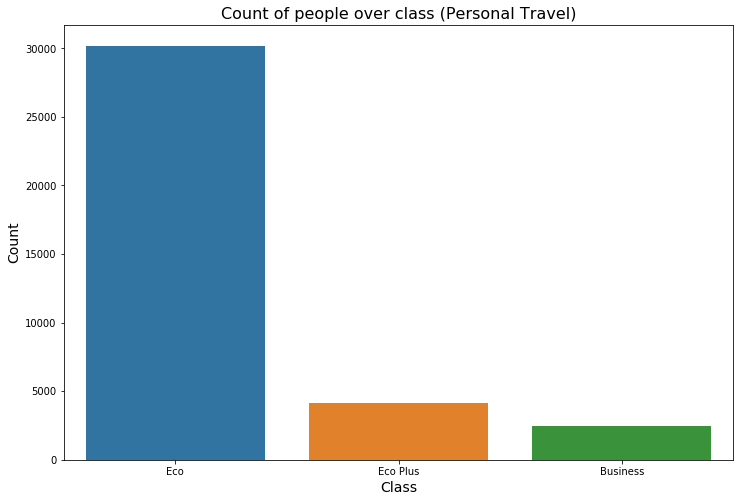

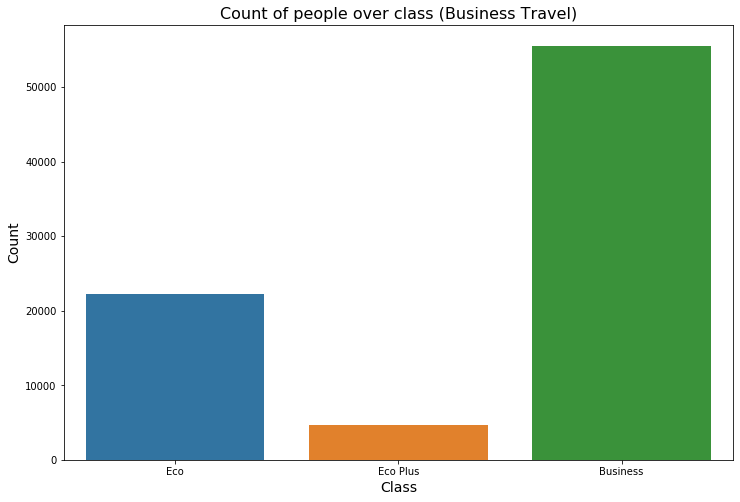

In [14]:
# splitting the dataset into 2 others according to the different travel types.
personal = data.loc[data['Type of Travel'] == 'Personal Travel']
business = data.loc[data['Type of Travel'] == 'Business travel']

print('Percentage of people travelling through economy class (Personal travel): {}'.format( (len(personal[personal.Class == 'Eco'])/len(personal))*100 ) )
print('Percentage of people travelling through business class (Personal travel): {}'.format( (len(personal[personal.Class == 'Business'])/len(personal))*100 ) )

print( '\n Percentage of people travelling through economy class (Business travel): {}'.format( (len(business[business.Class == 'Eco'])/len(business))*100 ) )
print('Percentage of people travelling through business class (Business travel): {}'.format( (len(business[business.Class == 'Business'])/len(business))*100 ) )

plt.figure(figsize=(12,8))
sns.countplot(data=personal, order=['Eco','Eco Plus','Business'], x="Class")
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of people over class (Personal Travel)', fontsize = 16)

plt.figure(figsize=(12,8))
sns.countplot(data=business, order=['Eco','Eco Plus','Business'], x="Class")
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of people over class (Business Travel)', fontsize = 16)

There is a significant difference between the number of travellers who fly business and those who fly Eco in both types of travel. From the first graph we see that 82% of the people who travel for personal reasons utilize Economy type of travel. One reason why we possibly see this is to save monyey. Whereas we see that only 6.6% of people utilize Business travel when they travel for personal reasons. However in the second graph, we see a completely opposite nature. 67.3% travel in business class compared to the 27% that travel in Economy class when they travel for business reasons. 

### Plotting count of customer based on customer type and class

Text(0.5, 1, 'Count of customer based on customer type and class ')

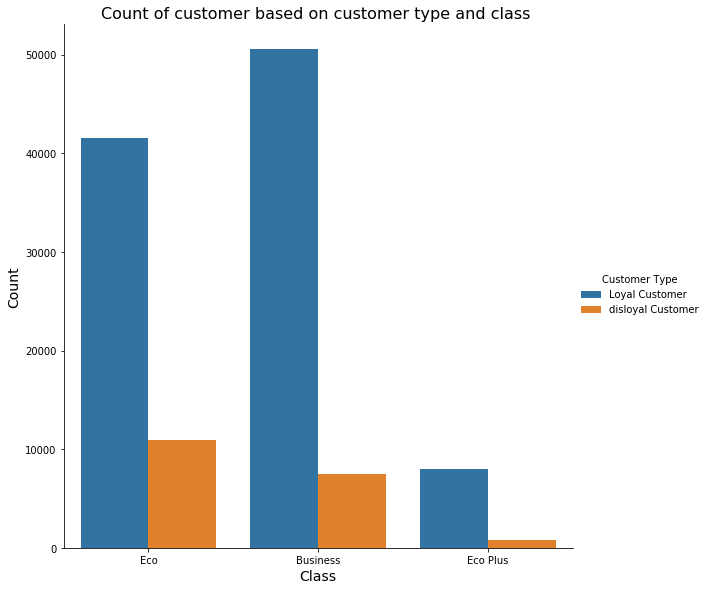

In [15]:
sns.catplot(x="Class", hue = "Customer Type", kind="count", data=data, height = 8);
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of customer based on customer type and class ', fontsize = 16)

A higher number of customers who are loyal to the airline travel in business class in comparison to disloyal customers. The disloyal customers who were surveyed here took the economy class more than the business one. This would make sense as business class is more expensive and someone who hasnt flown a lot through a specific airline would not pay the amount. They would instead pay less and try it out through the economy class.

### Analysis by Satisfaction Score

Satisfaction score is a score created by me that sums up all the scores from the categorical variables and would be used to further or analyze the relationships between the variables such as seat comfort / in-flight entertainment ands satisfaction level. In the below dataset the satisfaction score created is present in the last column.

In [16]:
data['score'] = data['Seat comfort'] + data['Departure/Arrival time convenient'] + data['Food and drink'] + data['Gate location'] + data['Inflight wifi service'] +\
data['Inflight entertainment'] + data['Online support'] + data['Ease of Online booking'] + data['On-board service'] + data['Leg room service'] + data['Baggage handling'] +\
data['Checkin service'] + data['Cleanliness'] + data['Online boarding']

data

Satisfaction Level  Gender      Customer Type  Age  \
0       neutral or dissatisfied    Male     Loyal Customer   48   
1       neutral or dissatisfied    Male     Loyal Customer   48   
2       neutral or dissatisfied    Male     Loyal Customer   40   
3       neutral or dissatisfied    Male     Loyal Customer   46   
4       neutral or dissatisfied    Male     Loyal Customer   63   
...                         ...     ...                ...  ...   
119251                satisfied  Female  disloyal Customer   11   
119252                satisfied  Female  disloyal Customer   29   
119253  neutral or dissatisfied    Male  disloyal Customer   63   
119254  neutral or dissatisfied    Male  disloyal Customer   66   
119255  neutral or dissatisfied  Female  disloyal Customer   38   

         Type of Travel     Class  Flight Distance  Seat comfort  \
0       Personal Travel       Eco             4001             1   
1       Personal Travel       Eco             3980             1   
2       Personal Travel       Eco             2251             1   
3       Personal Travel       Eco             2453             1   
4       Personal Travel       Eco             2011             1   
...                 ...       ...              ...           ...   
119251  Personal Travel       Eco             2752             5   
119252  Personal Travel       Eco             1731             5   
119253  Personal Travel  Business             2087             2   
119254  Personal Travel       Eco             2450             3   
119255  Personal Travel       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  Gate location  \
0                                       1               1              1   
1                                       1               1              1   
2                                       1               1              1   
3                                       1               1              1   
4                                       1               1              1   
...                                   ...             ...            ...   
119251                                  5               5              2   
119252                                  5               5              3   
119253                                  3               2              4   
119254                                  2               3              2   
119255                                  4               3              3   

        Inflight wifi service  Inflight entertainment  Online support  \
0                           1                       1               1   
1                           4                       1               4   
2                           1                       1               1   
3                           3                       1               5   
4                           5                       1               5   
...                       ...                     ...             ...   
119251                      2                       5               2   
119252                      2                       5               2   
119253                      2                       1               1   
119254                      3                       2               2   
119255                      3                       3               3   

        Ease of Online booking  On-board service  Leg room service  \
0                            1                 4                 1   
1                            4                 2                 3   
2                            1                 3                 3   
3                            3                 1                 4   
4                            5                 1                 5   
...                        ...               ...               ...   
119251                       2                 3                 5   
119252                       2           

To further understand the satisfaction score I will plot all of the satisfaction score from every passenger who has been surveyed. I will also categorize the satisfaction score into three different groups - Dissatisfied, neutral, satisfied. They are represented as bad, ok, and great in the code below. 

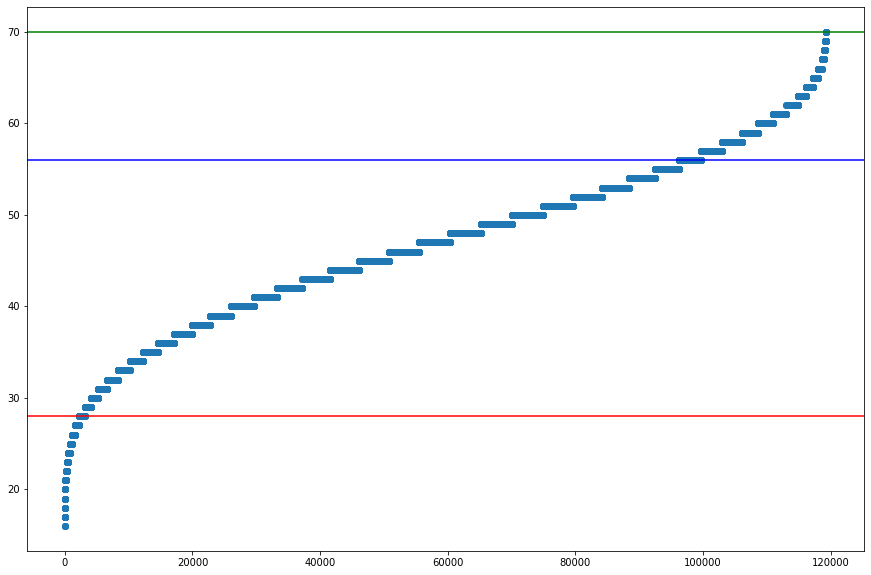

In [17]:
data = data.sort_values(by = ['score'])

plt.figure(figsize = (15, 10))
plt.scatter(np.arange(0, len(data), 1) , data['score'])
bad = 14*2
ok = 14*4
great = 14*5
plt.axhline(y=bad, color='r', linestyle='-')
plt.axhline(y=ok, color='b', linestyle='-')
plt.axhline(y=great, color='g', linestyle='-')

From the above graph, you can see that below the red line displays the number of people who were dissatisfied, above the blue line separates the dataset into the people who were satisfied, and the number of people who were in between the blue and red line with the number of people who were neither satisfied nor dissatisfied. Do you lions were created by looking at the rating system which was 1 to 5. Hence, the scores who had a maximum of 2 out of 5 in any of the categorical variables would classify under the red line. Scores who had a maximum of 4 in any of the categorical variables would classify under the blue line and above the redline. The scores who had a maximum of five in any of the categorical variables would be above the blue line and would come under the satisfied customers. 

## Deep Dive into Satisfaction score

### Plotting number of customers based of type of customer and satisfaction level

We use the satisfaction score created in the previous section to create two graphs based on low and high satisfaction. We will see the number of people who travel using economy, economy plus, and business who have been satisfied with their experience.

Text(0.5, 1, 'Number of customers based on Type of customer (High Satisfaction)')

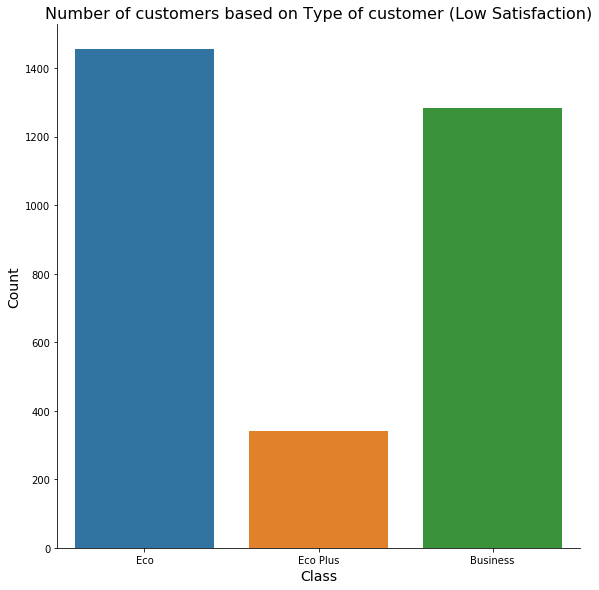

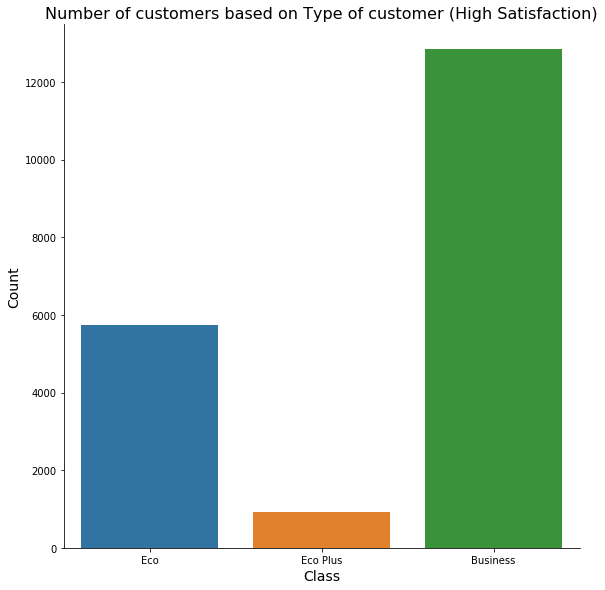

In [18]:
data = data.sort_values(by = ['score'])

bad_df = data.loc[data['score'] <= bad]
great_df = data.loc[(data['score'] <= great) & (data['score'] > ok)]

# will look at customer type, age, class
sns.catplot(x="Class", kind="count", data=bad_df, height = 8, order = ['Eco', 'Eco Plus', 'Business']);
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of customers based on Type of customer (Low Satisfaction)', fontsize = 16)

sns.catplot(x="Class", kind="count", data=great_df, height = 8, order = ['Eco', 'Eco Plus', 'Business']);
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of customers based on Type of customer (High Satisfaction)', fontsize = 16)

Customers who usually travelled in economy class were less satisfied with their experience on the flight. Although business customers were also not too satisfied they were lower than those in economy. In the second graph we see that business class customers dominate economy class customers on high satisfaction. This could be due to better amenities and service in that. Economy plius class did not seem to participate much as you can see. This would help airlines focus on economy and economy plus level.

### Plotting variables vs satisfaction score

In this subsection, each variable will be compared to the satisfaction score to see the correlation between them. I am using the seaborn module to plot the charts. This is slightly different in comparison to matplotlib. Here is a link to a quick tutorial: https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners

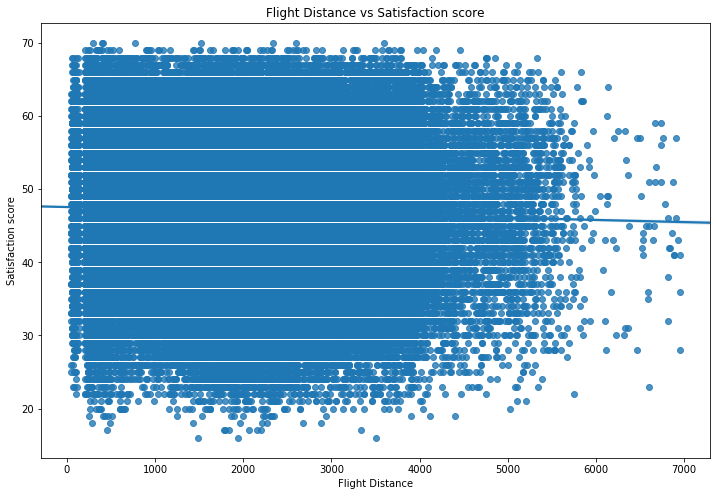

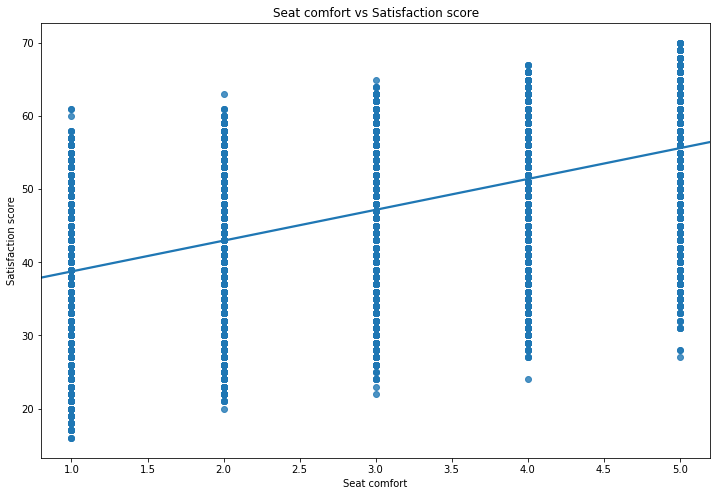

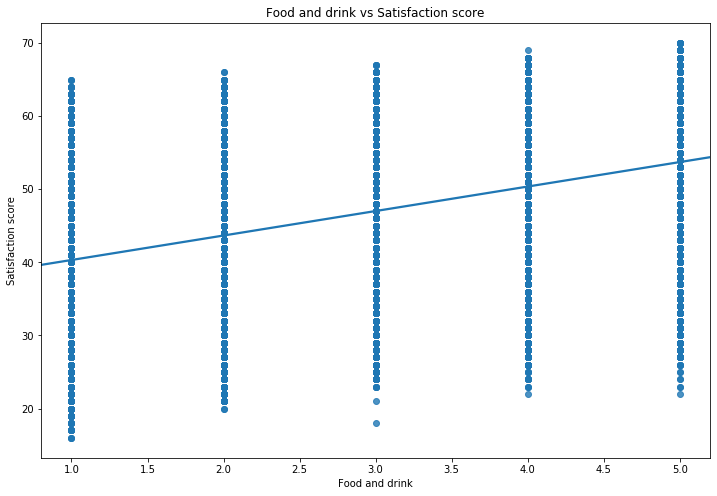

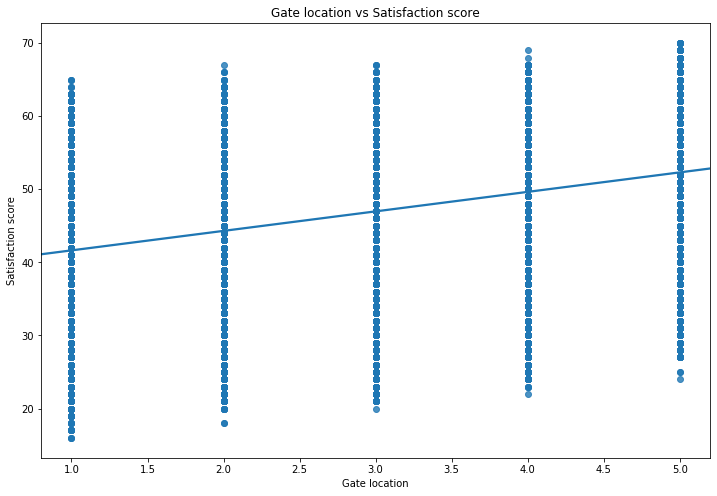

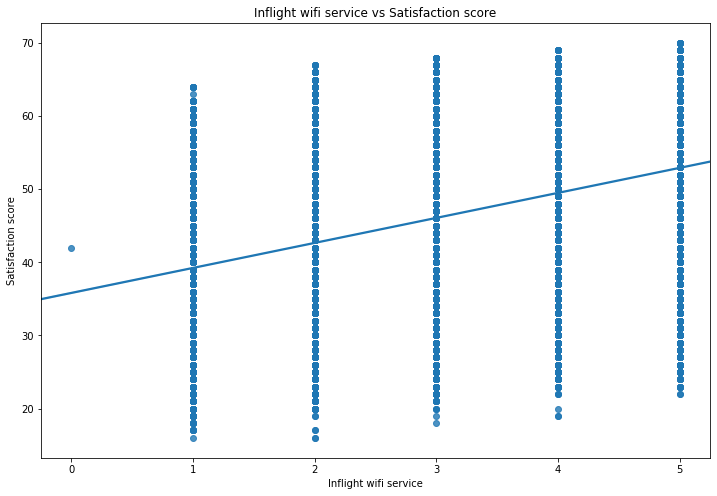

In [19]:
# Plotting all variables using a seperate plot for each
plt.figure(figsize=(12,8))
sns.regplot(x="Flight Distance", y="score", data=data)
plt.xlabel("Flight Distance")
plt.ylabel("Satisfaction score")
plt.title("Flight Distance vs Satisfaction score")
plt.show()

plt.figure(figsize=(12,8))
sns.regplot(x="Seat comfort", y="score", data=data)
plt.xlabel("Seat comfort")
plt.ylabel("Satisfaction score")
plt.title("Seat comfort vs Satisfaction score")
plt.show()

plt.figure(figsize=(12,8))
sns.regplot(x="Food and drink", y="score", data=data)
plt.xlabel("Food and drink")
plt.ylabel("Satisfaction score")
plt.title("Food and drink vs Satisfaction score")
plt.show()

plt.figure(figsize=(12,8))
sns.regplot(x="Gate location", y="score", data=data)
plt.xlabel("Gate location")
plt.ylabel("Satisfaction score")
plt.title("Gate location vs Satisfaction score")
plt.show()

plt.figure(figsize=(12,8))
sns.regplot(x="Inflight wifi service", y="score", data=data)
plt.xlabel("Inflight wifi service")
plt.ylabel("Satisfaction score")
plt.title("Inflight wifi service vs Satisfaction score")
plt.show()

Text(0.5, 1.0, 'Ease of Online booking vs Satisfaction score')

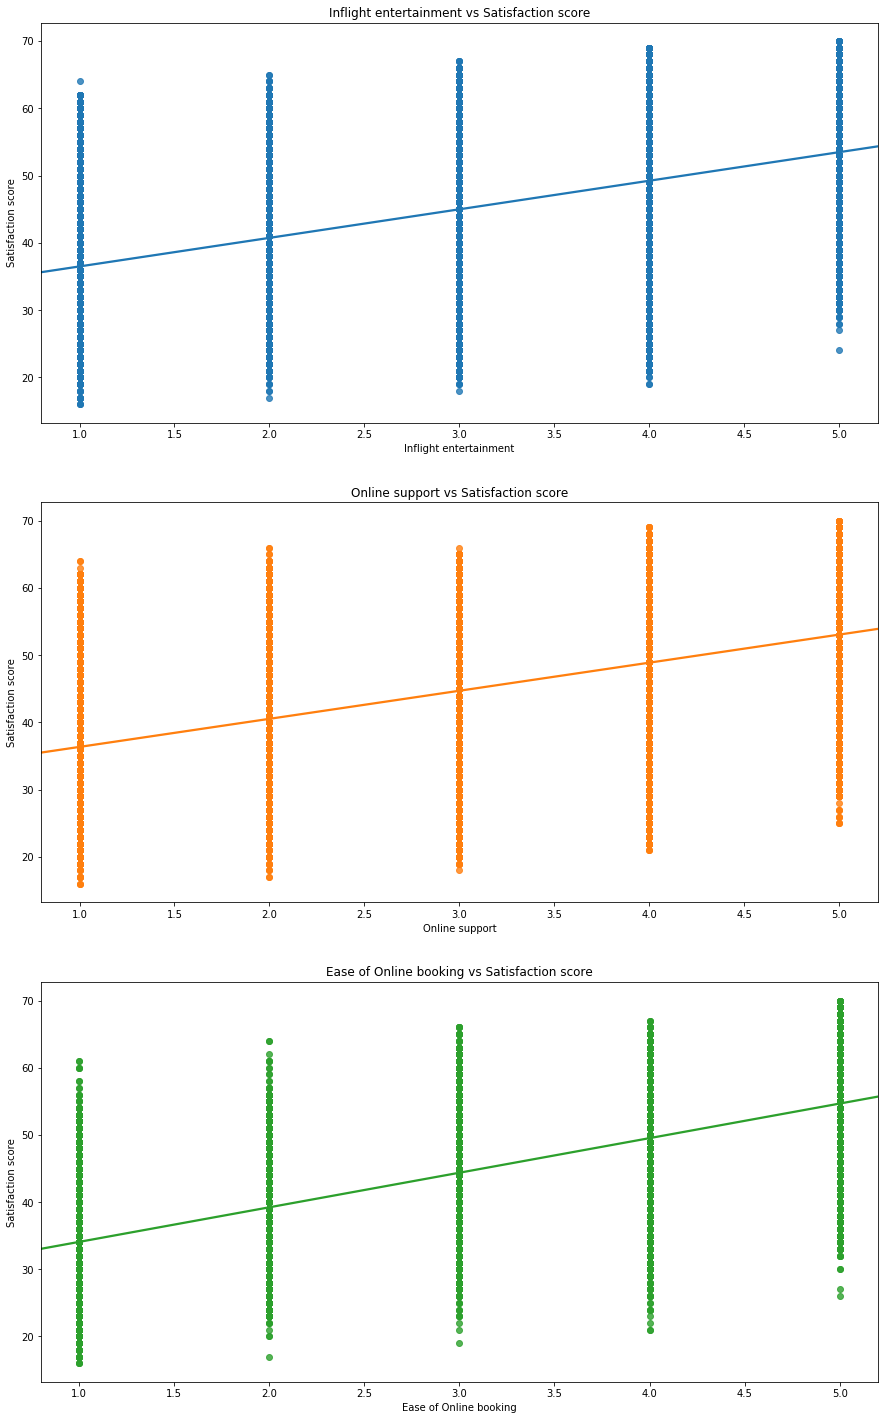

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(15,25))

sns.regplot(x="Inflight entertainment", y="score", data=data, ax = axs[0])
axs[0].set(xlabel="Inflight entertainment", ylabel="Satisfaction score")
axs[0].set_title("Inflight entertainment vs Satisfaction score")

sns.regplot(x="Online support", y="score", data=data, ax = axs[1])
axs[1].set(xlabel="Online support", ylabel="Satisfaction score")
axs[1].set_title("Online support vs Satisfaction score")

sns.regplot(x="Ease of Online booking", y="score", data=data, ax = axs[2])
axs[2].set(xlabel="Ease of Online booking", ylabel="Satisfaction score")
axs[2].set_title("Ease of Online booking vs Satisfaction score")

Text(0.5, 1.0, 'Baggage handling vs Satisfaction score')

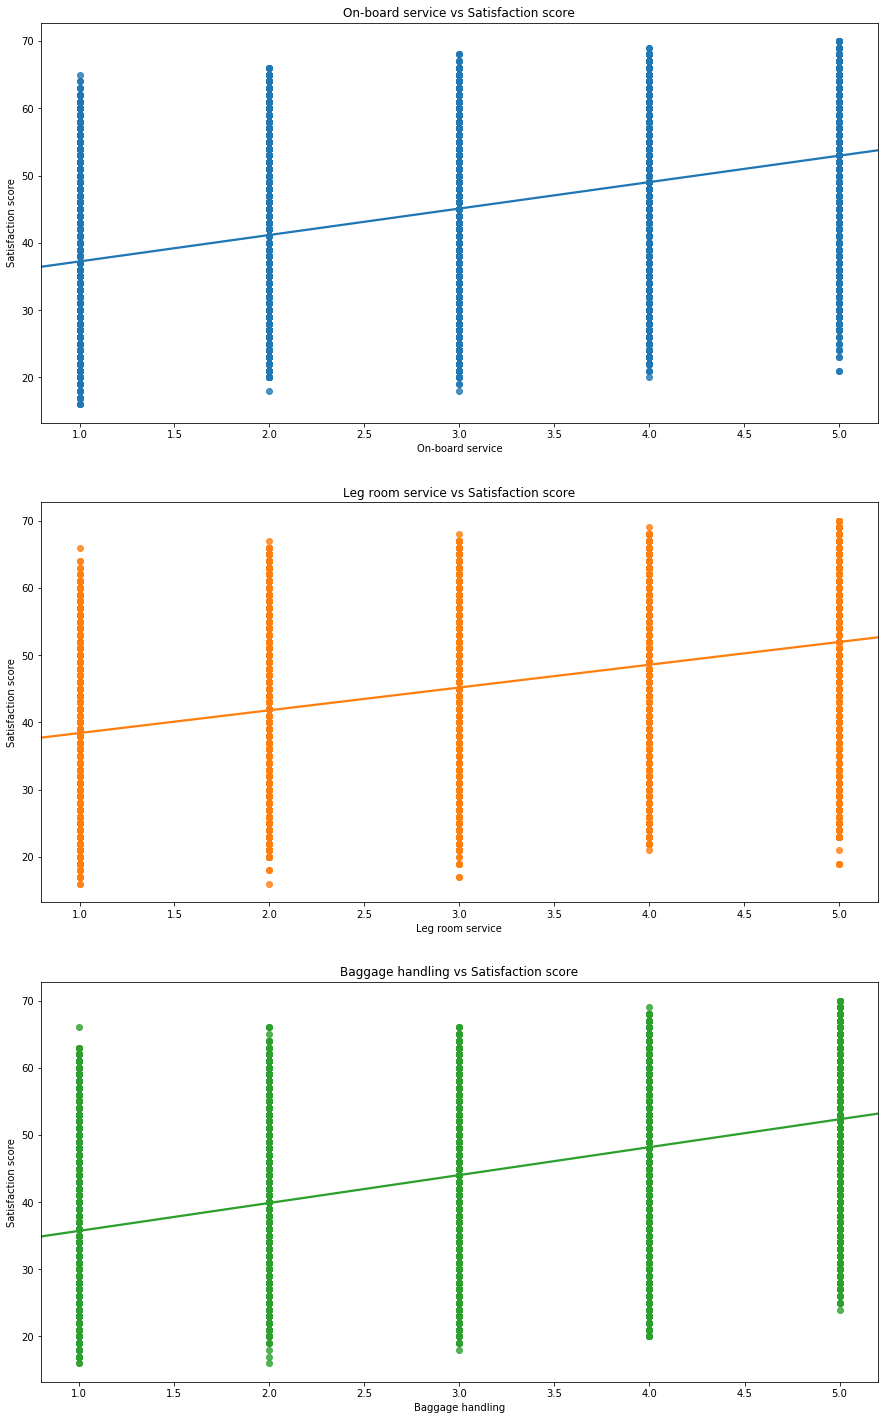

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(15,25))

sns.regplot(x="On-board service", y="score", data=data, ax = axs[0])
axs[0].set(xlabel="On-board service", ylabel="Satisfaction score")
axs[0].set_title("On-board service vs Satisfaction score")

sns.regplot(x="Leg room service", y="score", data=data, ax = axs[1])
axs[1].set(xlabel="Leg room service", ylabel="Satisfaction score")
axs[1].set_title("Leg room service vs Satisfaction score")

sns.regplot(x="Baggage handling", y="score", data=data, ax = axs[2])
axs[2].set(xlabel="Baggage handling", ylabel="Satisfaction score")
axs[2].set_title("Baggage handling vs Satisfaction score")

Text(0.5, 1.0, 'Arrival Delay in Minutes vs Satisfaction score')

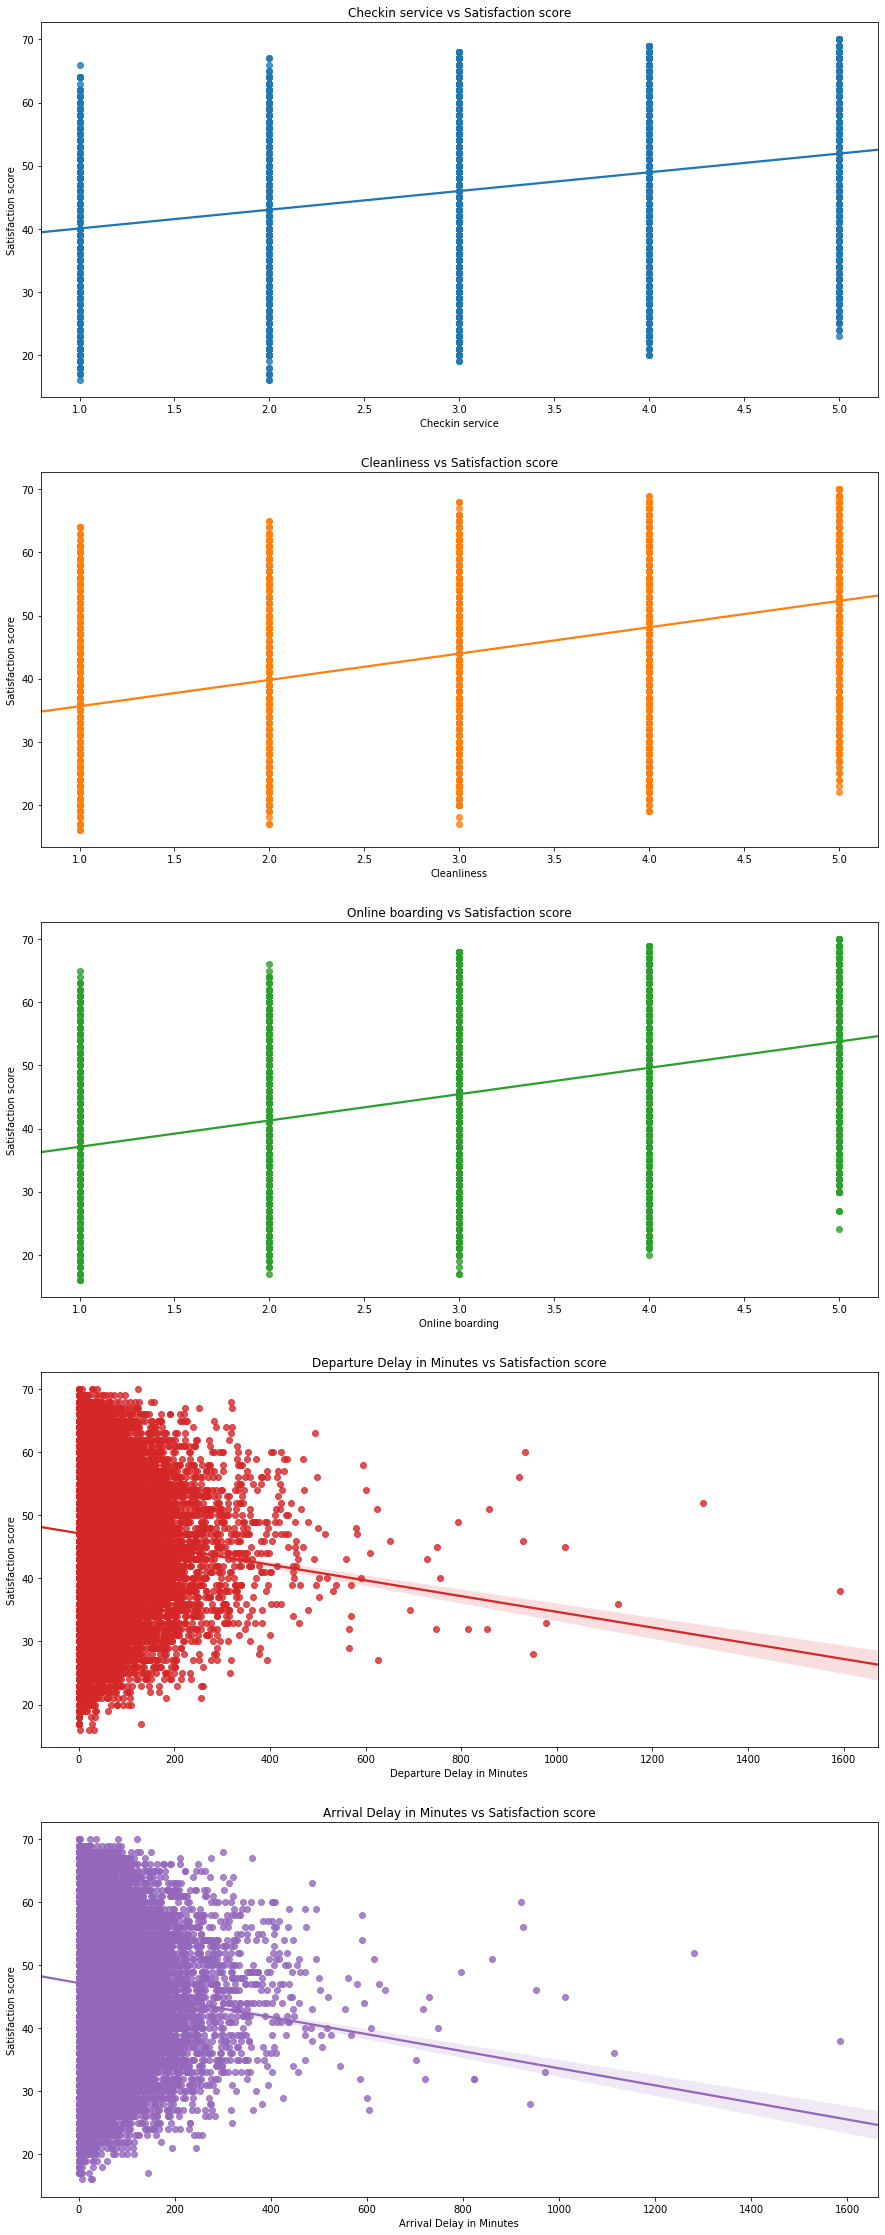

In [22]:
fig, axs = plt.subplots(5, 1, figsize=(15,40))

sns.regplot(x="Checkin service", y="score", data=data, ax = axs[0])
axs[0].set(xlabel="Checkin service", ylabel="Satisfaction score")
axs[0].set_title("Checkin service vs Satisfaction score")

sns.regplot(x="Cleanliness", y="score", data=data, ax = axs[1])
axs[1].set(xlabel="Cleanliness", ylabel="Satisfaction score")
axs[1].set_title("Cleanliness vs Satisfaction score")

sns.regplot(x="Online boarding", y="score", data=data, ax = axs[2])
axs[2].set(xlabel="Online boarding", ylabel="Satisfaction score")
axs[2].set_title("Online boarding vs Satisfaction score")

sns.regplot(x="Departure Delay in Minutes", y="score", data=data, ax = axs[3])
axs[3].set(xlabel="Departure Delay in Minutes", ylabel="Satisfaction score")
axs[3].set_title("Departure Delay in Minutes vs Satisfaction score")

sns.regplot(x="Arrival Delay in Minutes", y="score", data=data, ax = axs[4])
axs[4].set(xlabel="Arrival Delay in Minutes", ylabel="Satisfaction score")
axs[4].set_title("Arrival Delay in Minutes vs Satisfaction score")

With most of the variables above you can see a positive correlation such as seat comfort, in-flight entertainment and more. This would mean a comfortable seat or movies/tv/music on the flight would make the journey a pleasant one. The variables that had a negative correlation have been Departure delay in minutes and Arrival Delay in minutes. 

### Heatmap

(20.0, 0.0)

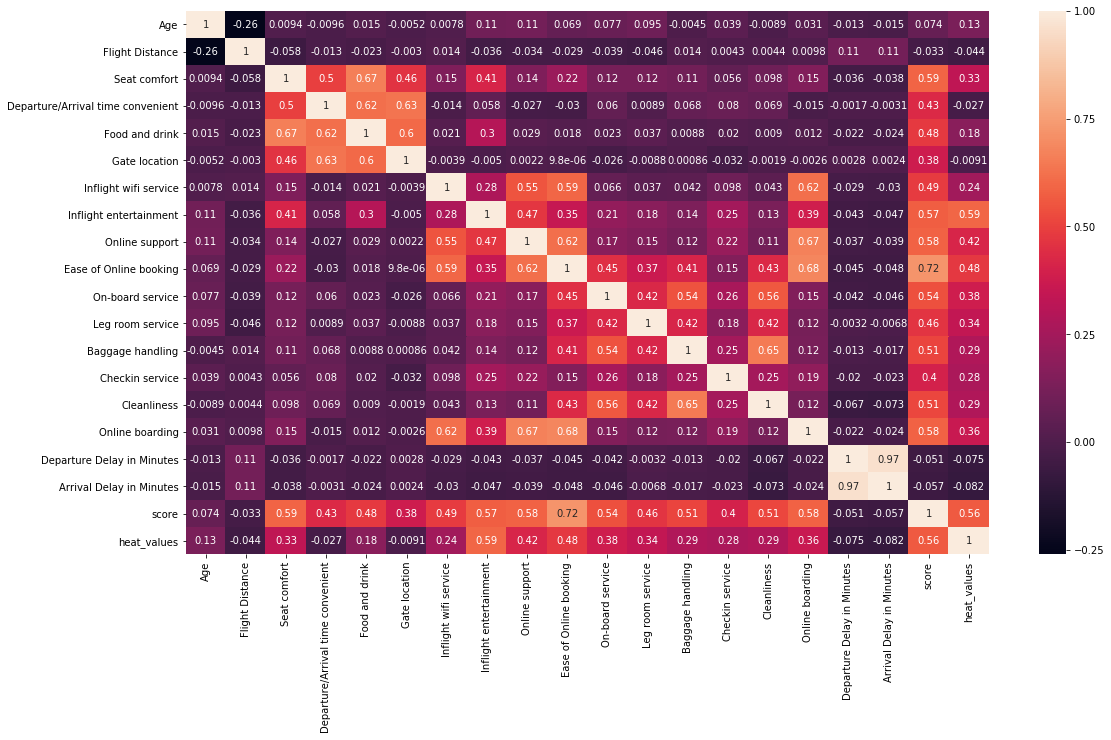

In [23]:
data['heat_values'] = (data['Satisfaction Level'] == 'satisfied').astype(int)

# Show heatmap for correlation each column
fig = plt.figure(figsize=(18,10))
ax = sns.heatmap(data.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

I have used a heatmap above to understand the above linear regression numerically. I have created a column called heat_values which mapped 0 if the passenger was dissatsified / neutral towards the experience or 1 if the customer was satisfied. We use this heatmap above to confirm our linear regression in graphs above. The last row about heat_values shows the relationship between whether the customers were satisfied and ech variables. For instance, as you can see Inflight entertainment plays a big part in satisfaction of a customer. 

# Machine Learning and Hypothesis Testing

In this section, we use feature engineering to turn every categorical variable into numerical ones. It is used  to optimize the accuracy of the model predictions. Then we  use Backward Elimination to reduce the number of features, based on Feature Selection & Feature Extraction. To learn more about these two concepts and how significant they are to ML, please click this link: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b and https://www.statisticssolutions.com/selection-process-for-multiple-regression/#:~:text=Backward%20elimination%20. 

We dont use a heatmap from the previous section because its not as accurate in feature selection. It is mainly used to check for multicollinearity.

### Feature Engineering and Backward Elimination Wrapper Method

In [27]:
import statsmodels.regression.linear_model as sm
data = data.dropna()
data.columns = [c.replace(' ', '_') for c in data.columns]

# Feature engineering
data['Gender_v2'] = data.Gender.map({
    'Male': 0,
    'Female' : 1})

data['ct_v2'] = data.Customer_Type.map({
    'Loyal Customer': 0,
    'disloyal Customer' : 1})

data['ToT_v2'] = data.Type_of_Travel.map({
    'Business travel': 0,
    'Personal travel' : 1})

data['Class_v2'] = data.Class.map({
    'Eco': 0,
    'Eco Plus' : 1,
    'Business' : 2})

# Dropping old categorical variables and target variables
X = data.drop(['score', 'heat_values','Gender', 'Satisfaction_Level', 'Customer_Type', 'Type_of_Travel', 'Class'],1) 
y = data['heat_values'] 

cols = list(X.columns)
pmax = 1

# Backward Elimination Wrapper Method
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break

print('The column selected from backward elimination wrapper method is: {}'.format(cols))

The column selected from backward elimination wrapper method is: ['Age', 'Seat_comfort', 'Departure/Arrival_time_convenient', 'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'ct_v2', 'ToT_v2', 'Class_v2']


The two models that will be used to predict passenger satisfaction are Random Forests and Kernel SVM. The advantage of using Random Forests is that it can give you a better predictive power than Decision Trees. Moreover, it is powerful and accurate, has good performance on many problems, including non linear. Kernel SVM has a high performance on nonlinear problems, it is not biased by outliers, and not sensitive to overfitting. So these two models are better compared to the other ones such as Logistic Regression and K-NN. 

## Random Forests

In [28]:
temp = data[cols].copy()

# splitting into target variable
temp = temp.astype('float')
X = temp.values
y = data.loc[:, "heat_values"].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm)

# jaccard_score 
print('Accuracy according to Jaccard score: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100 ))

# k fold accuracy
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy according to k fold : {:.2f} %".format(accuracies.mean()*100))

Confusion Matrix: 
[[ 8329   254]
 [  386 11643]]
Accuracy according to Jaccard score: 96.90 %
Accuracy according to k fold : 96.52 %


Above we use a confusion matrix. Confusion Matrix gives an idea of how well your model can perform. Here is a link if you would like more in depth infromation about it: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

I have a good confusion matrix with few prediction errors on the test set,hence it is a model with a good predictive power. So from the above we can see we have 8329 true positives, 254 false negatives, 386 false positives, 11643 True negatives.

- True positives: data points labeled as positive that are actually positive.
- False positives: data points labeled as positive that are actually negative.
- True negatives: data points labeled as negative that are actually negative.
- False negatives: data points labeled as negative that are actually positive.

However I have also used jaccard score and k fold classification to check our accuracy. Jaccard score takes the size of the intersection divided by the size of the union of two label sets - in this case are the actual test results and the estimated predictions. K fold consists of evaluating the model on several test sets (called the validation sets), so that we can make sure we don’t get lucky on one single test set. Both have a great score of above 96%. To learn more about both forms of accuracy measurement please take a look at these 2 links: 
https://deepai.org/machine-learning-glossary-and-terms/jaccard-index
https://machinelearningmastery.com/k-fold-cross-validation/

We next plot the actual test values and estimated ones from the random forests model.

Text(0.5, 1.0, 'Count of predictions from Random Forests')

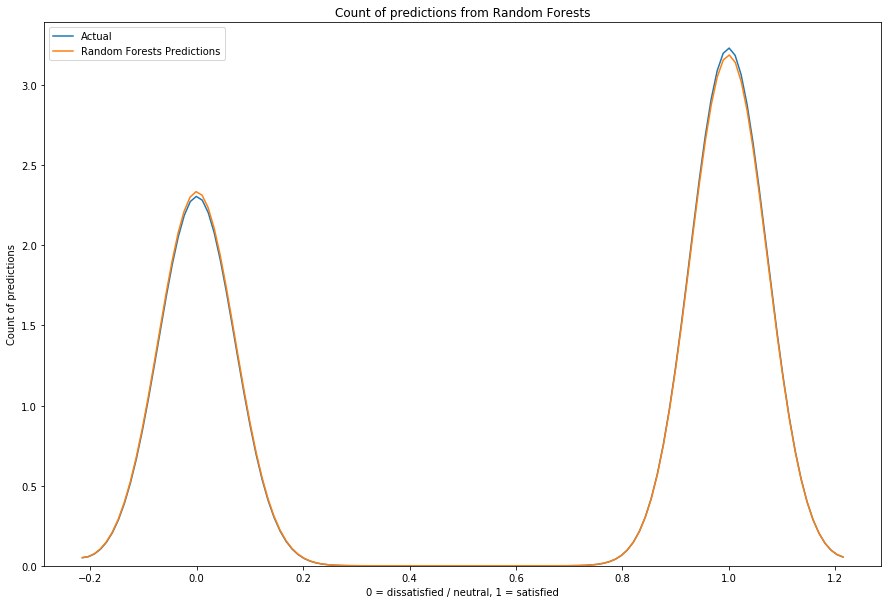

In [29]:
plt.figure(figsize = (15, 10))
sns.distplot(y_test, hist=False, label="Actual")
sns.distplot(y_pred, hist=False, label="Random Forests Predictions")
plt.xlabel("0 = dissatisfied / neutral, 1 = satisfied")
plt.ylabel("Count of predictions")
plt.title("Count of predictions from Random Forests")

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8583
           1       0.98      0.97      0.97     12029

   micro avg       0.97      0.97      0.97     20612
   macro avg       0.97      0.97      0.97     20612
weighted avg       0.97      0.97      0.97     20612



To evaluate the model we have used the classification report from scikitlearn. It depicts the precision and recall as well as the F score of the model when classifying it into 0 and 1 where 0 are predicting dissatisfied/neutral passengers and 1 is predicting satisfied passengers. To recap, recall gives us an idea about when it’s actually yes, how often does it predict yes and precision tells us about when it predicts yes, how often is it correct. From above we see the Precision in predicting the dissatisfied customers is 0.96 and precision in predicting the satisfied customers is 0.98. Furthermore, the recall for predicting dissatisfied customer is a 0.97 and predicting satisfied customers is 0.97. They are both extremely good scores and show us our model is well built and can predict tests well.

### Kernel SVM

In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM Classification model on the Training set
kernel = SVC(kernel = 'rbf', random_state = 0, gamma = 'scale')
kernel.fit(X_train, y_train)
y_pred = kernel.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm)
print('Accuracy according to Jaccard score: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100 ))

# k fold
accuracies = cross_val_score(estimator = kernel, X = X_train, y = y_train, cv = 10)
print("Accuracy according to k fold : {:.2f} %".format(accuracies.mean()*100))

Confusion Matrix: 
[[ 8158   425]
 [  445 11584]]
Accuracy according to Jaccard score: 95.78 %
Accuracy according to k fold : 95.67 %


Above we use a confusion matrix. Confusion Matrix gives an idea of how well your model can perform. I have a good confusion matrix with few prediction errors on the test set - 8158 True positives and 11584 true negatives. Here we also get a high jaccard and k fold accuracy score (both at 95%)

We next plot the actual test values and estimated ones from the Kernel SVM model

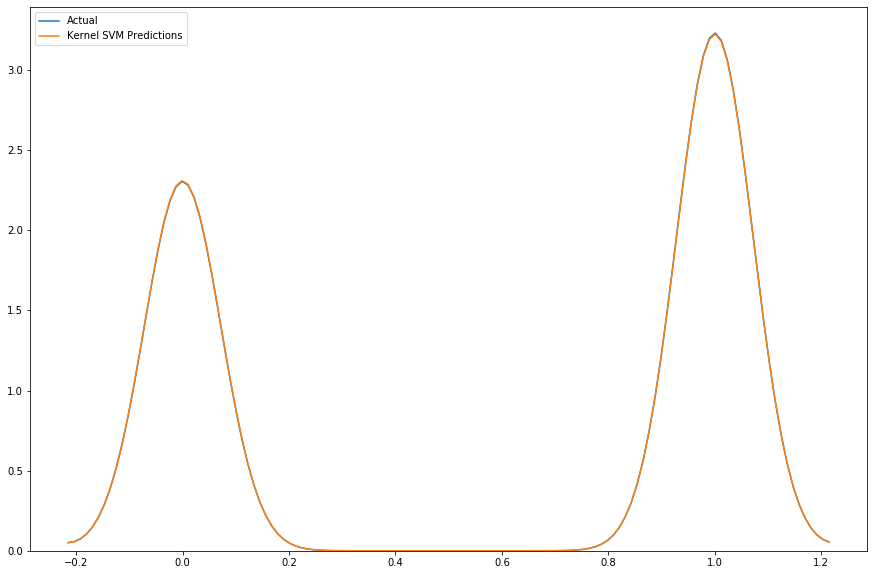

In [32]:
plt.figure(figsize = (15, 10))
sns.distplot(y_test, hist=False, label="Actual")
sns.distplot(y_pred, hist=False, label="Kernel SVM Predictions")

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8583
           1       0.96      0.96      0.96     12029

   micro avg       0.96      0.96      0.96     20612
   macro avg       0.96      0.96      0.96     20612
weighted avg       0.96      0.96      0.96     20612



Finally, to evaluate the Kernel SVM model we use the classification model. As from the previous model this model also has a good recall and precision score. Furthermore, we can see that all the variables chosen in the backward elimination wrapper method have been significant to enhance the model. 

# Conclusion and Further Exploration

In conclusion, it can be said that in the Exploratory Data Analysis we were able to analyze the data that we had to gain information on the satisfaction of customers who are flying with their lights. The insights in that section helped usUnderstanding how gender, age, class, type of travel and many more contribute to creating a good satisfaction level in individuals. We were Able to do this through creating multiple bar charts, scatter graphs, And other visual representations to help us understand and comprehend the data even more. Then, we were able to create two very efficient machine learning models using random forests and kernel SVM That had the accuracy scores above 95% for both.

Further steps would include looking to improve the accuracy of the models, possibly using XGBoost in python. Additionally, it would also help to look at using other models to experiement with the efficiency. To understand more about each of the topics I have included special links under each section of code, in the prose, which could help in grasping the topics better.

Some links to understand boosting could be found here:

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/